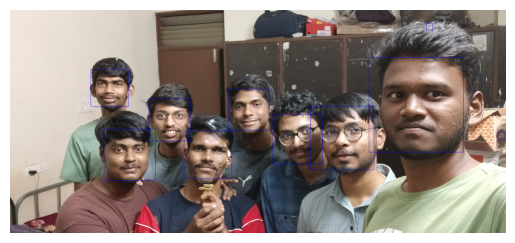

In [29]:
# Import necessary libraries
import cv2
import matplotlib.pyplot as plt

# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to detect faces in an image
def detect_faces(image_path):
    # Read the input image
    image = cv2.imread(image_path)
    
    # Check if the image was correctly loaded
    if image is None:
        print("Error: Unable to load image. Please check the file path.")
        return
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    # Draw rectangles around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    # Display the output
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Test the function with a correctly formatted file path
detect_faces(r"C:\Users\Hemanth kumar\Downloads\IMG_20250222_001448.jpg")

In [30]:
!pip install opencv-python tensorflow numpy

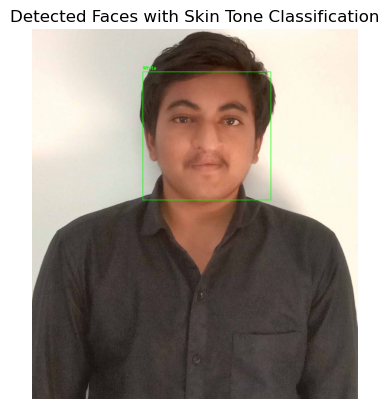

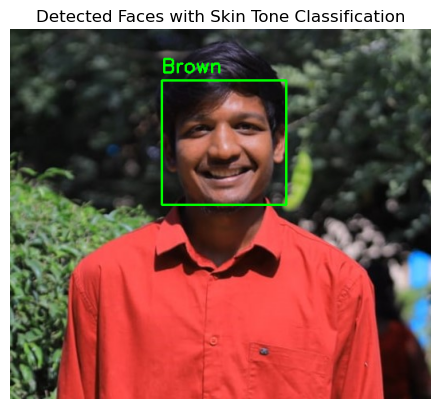

In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the pre-trained Haar Cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to classify skin tone based on average color
def classify_skin_color(face_roi):
    # Convert face ROI to RGB
    rgb_face = cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB)
    
    # Take the center region of the face to reduce background noise
    h, w, _ = rgb_face.shape
    center_face = rgb_face[h//4:h*3//4, w//4:w*3//4]

    # Calculate average color
    avg_color = np.mean(center_face.reshape(-1, 3), axis=0)
    r, g, b = avg_color

    # Simple skin color classification based on red component (can be refined)
    if r < 90:
        return "Black"
    elif 90 <= r <= 160:
        return "Brown"
    else:
        return "White"

# Function to detect and classify face tones
def detect_and_classify_faces(image_path):
    image = cv2.imread(image_path)
    
    if image is None:
        print("Error: Unable to load image.")
        return
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        face_roi = image[y:y+h, x:x+w]
        skin_color = classify_skin_color(face_roi)

        # Draw rectangle and label
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image, skin_color, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    # Display the result
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Detected Faces with Skin Tone Classification")
    plt.show()

# Test it
detect_and_classify_faces(r"C:\Users\Hemanth kumar\OneDrive\Pictures\a18b45a5-bfb7-410b-a67c-96b7bba4cf59.jpg")
detect_and_classify_faces(r"C:\Users\Hemanth kumar\OneDrive\Pictures\fbea2807-2d83-4dc9-a279-648202dec9cb.jpg")


In [32]:
import cv2
import numpy as np   # Missing import

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open webcam
cap = cv2.VideoCapture(0)

def classify_skin_color(face_roi):
    # Convert face ROI to RGB
    rgb_face = cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB)
    
    # Take the center region of the face to reduce background noise
    h, w, _ = rgb_face.shape
    center_face = rgb_face[h//4:h*3//4, w//4:w*3//4]

    # Calculate average color
    avg_color = np.mean(center_face.reshape(-1, 3), axis=0)
    r, g, b = avg_color

    # Simple skin color classification (can be refined)
    if r < 90:
        return "Black"
    elif 90 <= r <= 160:
        return "Brown"
    else:
        return "White"


if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

while True:
    ret, frame = cap.read()
    
    if not ret:
        print("Error: Could not read frame.")
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    for (x, y, w, h) in faces:
        face_roi = frame[y:y+h, x:x+w]  # corrected
        skin_color = classify_skin_color(face_roi)

        # Draw rectangle and label on frame
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, skin_color, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 
                    0.8, (0, 255, 0), 2)
    
    cv2.imshow('Live Face Detection', frame)
     
    if cv2.waitKey(1) & 0xFF == ord(' '):  # Press SPACE to quit
        break

cap.release() 
cv2.destroyAllWindows()
